14


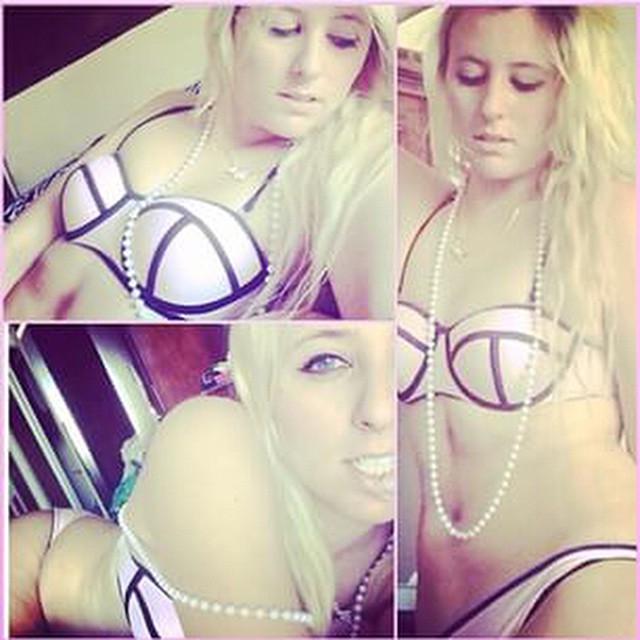

In [2]:
import sys, termios, tty, os, time
#import autopy
import ipywidgets as widgets
current_directory = os.getcwd()
try :
    path_nude = os.path.join(current_directory ,  'Nude')
    os.makedirs(path_nude)
except FileExistsError as e :
    pass

try :
    path_animated = os.path.join(current_directory ,  'Animated')
    os.makedirs(path_animated)
except FileExistsError as e :
    pass

try :
    path_porn = os.path.join(current_directory ,  'Porn')
    os.makedirs(path_porn)
except FileExistsError as e :
    pass

import glob , pickle
datadir = 'pics'
imgs = glob.glob(os.path.join(datadir, '*.jpg'))
print(len(imgs))

import pickle as pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)   
    
try:
    lookup = load_obj('work_done')
except (OSError, IOError) as e:
    lookup = {}
    for img in imgs:
        lookup[img] = 0
    save_obj( lookup , 'work_done')

import matplotlib.pyplot as plt
plt.ion()
#from PIL import Image
from IPython.display import Image
from IPython.display import clear_output
import shutil

lookup = load_obj('work_done')
def on_nude_Button(b):
    global i
    global lookup
    global imgs
    #plt.close()
    if i < len(imgs)  and lookup[imgs[i]] == 0:
        clear_output()
        lookup[imgs[i]] = 1
        shutil.move(imgs[i],path_nude)
        i += 1
        display(Image(imgs[i]))
        display(hb)
    
#     im = Image.open( imgs[i]) 
#     plt.imshow(im)
    
    print('nude_clicked')
    
def on_Porn_Button(b):
    global i
    global lookup
    global imgs
    if i < len(imgs) and lookup[imgs[i]] == 0 :
        clear_output()
        lookup[imgs[i]] = 1
        shutil.move(imgs[i],path_porn)
        i += 1
        display(Image(imgs[i]))
        display(hb)
    
        print('porn_clicked')
    
def on_animated_Button(b):
    global i
    global lookup
    global imgs
    if i < len(imgs) and lookup[imgs[i]] == 0:
        clear_output()
        lookup[imgs[i]] = 1
        shutil.move(imgs[i],path_animated)
        i += 1
        display(Image(imgs[i]))
        display(hb)
    
    print('animated_clicked')
    
def on_Quit_Button(b):
    print('Quit_clicked')
    save_obj(lookup , 'work_done')
    clear_output()

Nude_button = widgets.Button(description= "Nude")
Porn_button = widgets.Button(description= "Porn")
Animated_button = widgets.Button(description= "Animated")
Quit_Button = widgets.Button(description= "Quit")

Nude_button.on_click(on_nude_Button)
Porn_button.on_click(on_Porn_Button)
Animated_button.on_click(on_animated_Button)
Quit_Button.on_click(on_Quit_Button)


hb= widgets.HBox([ Nude_button , Porn_button , Animated_button , Quit_Button ])


i = 0 
if i < len(imgs):
    display( Image(imgs[i]) )
    display(hb)

    





    
    